In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import linear_model as sklm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
import nltk
from nltk.corpus import names
import random
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random


housing_dat = pd.read_csv('USA_Housing.csv')
#df = pd.read_csv('mushrooms.csv')


housing_dat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
def state_search(state, address):
    
    for ele in state:
        if ele in address: 
            return ele
    return "no state"
def index_search(state, address):
    
    for ele in range(0,len(state)):
        if state[ele] in address: 
            return ele
    return 42069



In [4]:
states_and_territory = pd.read_csv('states.csv')
states_and_territory.sort_values('abrev')
#housing_dat['state'] = housing_dat[state.abrev.isin(housing_dat.Address)]
state_abrev= states_and_territory['abrev']
state_abrev= state_abrev.to_list()

housing_dat['state'] = [state_search(state_abrev,ele) for ele in  housing_dat['Address'] ]
housing_dat['index_state'] = [index_search(state_abrev,ele) for ele in  housing_dat['state'] ]

bystate= housing_dat.sort_values('index_state')
bystate= bystate[bystate.index_state != 42069]
#bystate.drop('no state',axis='columns')
#print(bystate['state'][0:20])
#print(housing_dat[housing_dat['state']=='no state'].shape)

#print(bystate['Avg. Area Income'].unique()[44])
#
bystate.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state,index_state
1286,80939.634573,6.334546,7.647145,3.31,27771.544505,1.499921e+06,"7084 Turner Crossing Suite 917\nNew Mary, AL 1...",AL,0
381,62377.064471,6.289993,7.218400,4.46,39075.956378,1.285400e+06,"7508 Alyssa Mission\nMccartytown, AL 15250-4289",AL,0
1011,73508.359121,6.271705,6.772990,3.49,34894.576334,1.126821e+06,"8580 Caleb Rapid Suite 109\nKarenchester, AL 0...",AL,0
3572,80694.128150,6.569158,6.455327,2.15,46249.625657,1.770372e+06,"24903 Anthony Drives\nLake Suzanneborough, AL ...",AL,0
2788,55470.081861,5.694779,6.810466,2.49,36246.412935,9.625317e+05,"568 Johnston Mountain\nNew Janice, AL 53432-9841",AL,0


In [5]:
def affordable_or_not(salary, price):
    mx_price= 4*salary
    return mx_price>=price

In [27]:
afford= ((bystate['Avg. Area Income']*8) >= bystate['Price'] )

afford = afford.astype(int)
num=0
for ele in afford:
    if ele  : num+=1
print(num)

bystate['afford_or_not']= afford
print(bystate.shape)

59
(4527, 10)


In [28]:
#sns.scatterplot(data=bystate,x='Price',y='Area Population')

In [29]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Bedrooms')

In [30]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Income')

In [31]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area House Age')

In [32]:
#sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Rooms')

In [33]:
#sns.regplot(data=bystate,x='Price',y='Avg. Area Income')

In [34]:
#bystate['costal_or_not']= ((bystate['state']=='TX')  | (bystate['state']=='FL')  | (bystate['state']=='PN')  | (bystate['state']=='IL') | (bystate['state']=='NY') | (bystate['state']=='CA'))
#bystate['costal_or_not']= bystate['costal_or_not'].astype(int)


In [54]:
from sklearn.linear_model import LogisticRegression


X = bystate[[ 'Area Population','Price']]
y = bystate.afford_or_not

print(min(bystate['Area Population'])," ",max(bystate['Area Population']))
lm = LogisticRegression()
lm.fit(X, y)

#print(lm.intercept_)
#print(lm.coef_)

172.61068627290044   69592.04023598543


LogisticRegression()

In [55]:
y_pred = lm.predict(X)
# look at what values were predicted




display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [0.00,1.00]'

'precision = [0.98914729 0.83333333]'

'recall = [0.99955237 0.16949153]'

'f-score = [0.99432261 0.28169014]'

# SVM


In [37]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import math

[ 7.81627068e-05 -8.92328439e-06]


Text(0, 0.5, 'Price')

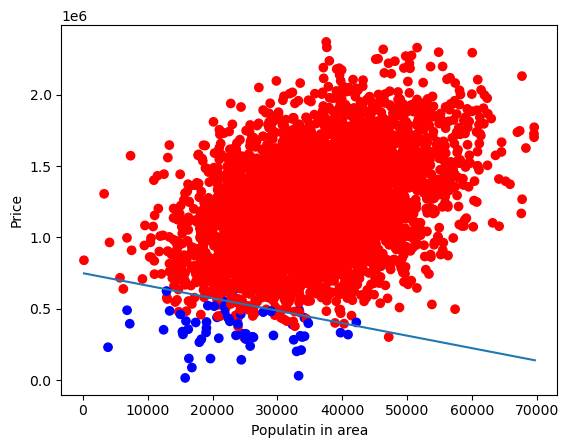

In [62]:

X = bystate[[ 'Area Population','Price']]
y = bystate.afford_or_not

con=750000
b0 = lm.intercept_[0]
b = lm.coef_[0]
print(b)
xdb= [173.23, 69690.5]
ydb = [con+(b0+b[0]*x)/b[1] for x in xdb]
plt.plot(xdb, ydb)



color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(bystate['Area Population'], bystate['Price'], c=color)
plt.xlabel('Populatin in area')
plt.ylabel('Price')



In [39]:
clf = svm.SVC(kernel='linear', class_weight={0:1})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))




'precision = [0.99687011 0.83333333]'

'recall = [0.99798568 0.76271186]'

'f-score = [0.99742758 0.79646018]'

In [42]:
clf = svm.SVC(kernel='poly',  degree=2)
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))






'precision = [0.99487294 0.87804878]'

'recall = [0.99888093 0.61016949]'

'f-score = [0.99687291 0.72      ]'

'precision = [0.99598125 0.85416667]'

'recall = [0.9984333  0.69491525]'

'f-score = [0.99720577 0.76635514]'

Text(0, 0.5, 'Price')

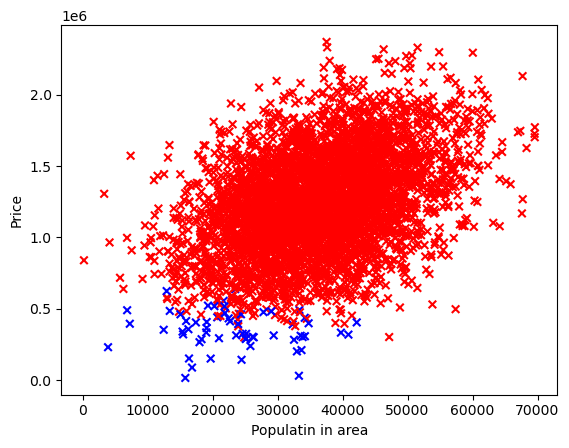

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


plt.scatter( bystate['Area Population'], bystate['Price'],c=color, s=30, marker='x')
plt.xlabel('Populatin in area')
plt.ylabel('Price')